In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('ecommerce_transactions dataset.csv') 


In [3]:
print("First 5 Rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

First 5 Rows:
    Transaction_ID        User_Name  Age  Country Product_Category  \
0               1         Ava Hall   63   Mexico         Clothing   
1               2      Sophia Hall   59    India           Beauty   
2               3  Elijah Thompson   26   France            Books   
3               4     Elijah White   43   Mexico           Sports   
4               5       Ava Harris   48  Germany           Beauty   

   Purchase_Amount Payment_Method Transaction_Date  
0           780.69     Debit Card       14-04-2023  
1           738.56         PayPal       30-07-2023  
2           178.34    Credit Card       17-09-2023  
3           401.09            UPI       21-06-2023  
4           594.83    Net Banking       29-10-2024  

Missing values:
 Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64


In [5]:
df.dropna(inplace=True) 

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Product_Category'] = le.fit_transform(df['Product_Category'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])

In [6]:
X = df[['Age', 'Country', 'Product_Category', 'Payment_Method']] 
y = df['Purchase_Amount'] 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)



📈 Model Evaluation:
Mean Squared Error (MSE): 82817.59914096835
R-squared Score (R2): -0.0008213590418346683


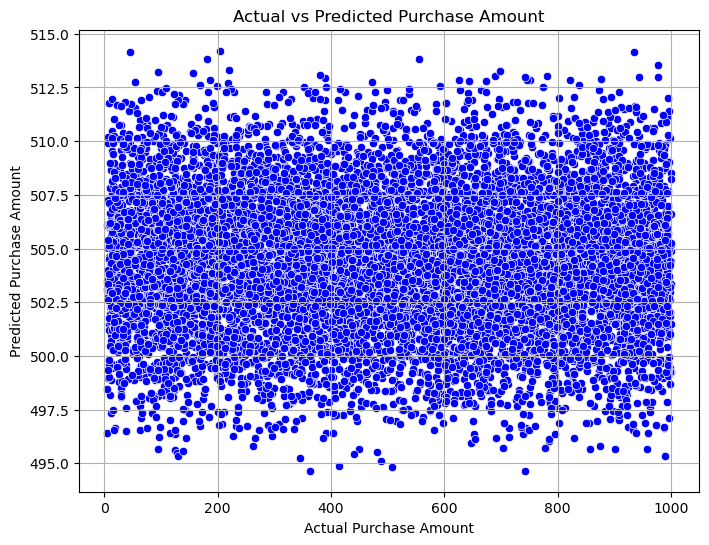

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n📈 Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted Purchase Amount")
plt.grid(True)
plt.show()

 Predict High vs Low Spenders

First 5 Rows:
    Transaction_ID        User_Name  Age  Country Product_Category  \
0               1         Ava Hall   63   Mexico         Clothing   
1               2      Sophia Hall   59    India           Beauty   
2               3  Elijah Thompson   26   France            Books   
3               4     Elijah White   43   Mexico           Sports   
4               5       Ava Harris   48  Germany           Beauty   

   Purchase_Amount Payment_Method Transaction_Date  
0           780.69     Debit Card       14-04-2023  
1           738.56         PayPal       30-07-2023  
2           178.34    Credit Card       17-09-2023  
3           401.09            UPI       21-06-2023  
4           594.83    Net Banking       29-10-2024  

Missing values:
 Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64

Using median threshold for classification: 5

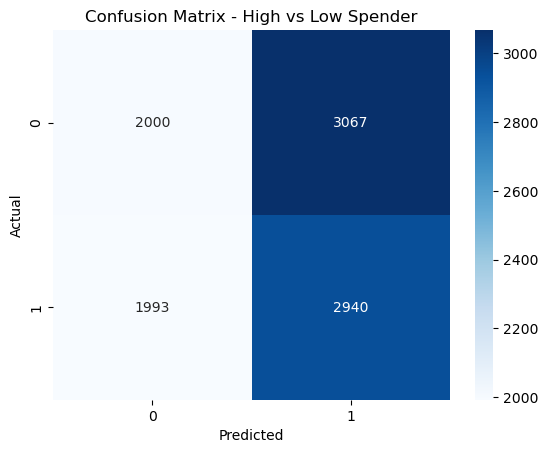

In [14]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv('ecommerce_transactions dataset.csv')  
print("First 5 Rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
df.dropna(inplace=True)
threshold = df['Purchase_Amount'].median()
print(f"\nUsing median threshold for classification: {threshold}")
df['Spender_Type'] = df['Purchase_Amount'].apply(lambda x: 1 if x > threshold else 0)
print("\nClass Distribution:\n", df['Spender_Type'].value_counts())
if df['Spender_Type'].nunique() < 2:
    raise ValueError("Dataset still contains only one class after thresholding. Adjust your data or threshold.")
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Product_Category'] = le.fit_transform(df['Product_Category'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])
X = df[['Age', 'Country', 'Product_Category', 'Payment_Method']]
y = df['Spender_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - High vs Low Spender")
plt.show()



Predict Payment Method

First 5 Rows:
    Transaction_ID        User_Name  Age  Country Product_Category  \
0               1         Ava Hall   63   Mexico         Clothing   
1               2      Sophia Hall   59    India           Beauty   
2               3  Elijah Thompson   26   France            Books   
3               4     Elijah White   43   Mexico           Sports   
4               5       Ava Harris   48  Germany           Beauty   

   Purchase_Amount Payment_Method Transaction_Date  
0           780.69     Debit Card       14-04-2023  
1           738.56         PayPal       30-07-2023  
2           178.34    Credit Card       17-09-2023  
3           401.09            UPI       21-06-2023  
4           594.83    Net Banking       29-10-2024  

Missing values:
 Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64

📈 Classification Report:
               prec

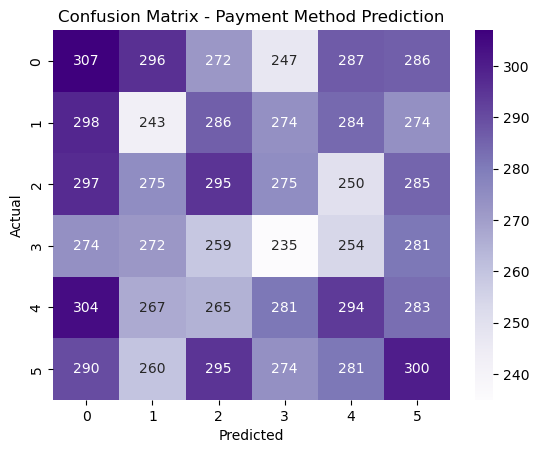

Payment Method Classes: ['Cash on Delivery' 'Credit Card' 'Debit Card' 'Net Banking' 'PayPal'
 'UPI']


In [16]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('ecommerce_transactions dataset.csv') 

print("First 5 Rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

df.dropna(inplace=True)

le_country = LabelEncoder()
le_category = LabelEncoder()
le_payment = LabelEncoder()

df['Country'] = le_country.fit_transform(df['Country'])
df['Product_Category'] = le_category.fit_transform(df['Product_Category'])
df['Payment_Method'] = le_payment.fit_transform(df['Payment_Method'])

X = df[['Age', 'Country', 'Product_Category', 'Purchase_Amount']]
y = df['Payment_Method']  # Encoded payment method

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Payment Method Prediction")
plt.show()
decoded = le_payment.inverse_transform(sorted(df['Payment_Method'].unique()))
print("Payment Method Classes:", decoded)


Predict Product Category

First 5 Rows:
    Transaction_ID        User_Name  Age  Country Product_Category  \
0               1         Ava Hall   63   Mexico         Clothing   
1               2      Sophia Hall   59    India           Beauty   
2               3  Elijah Thompson   26   France            Books   
3               4     Elijah White   43   Mexico           Sports   
4               5       Ava Harris   48  Germany           Beauty   

   Purchase_Amount Payment_Method Transaction_Date  
0           780.69     Debit Card       14-04-2023  
1           738.56         PayPal       30-07-2023  
2           178.34    Credit Card       17-09-2023  
3           401.09            UPI       21-06-2023  
4           594.83    Net Banking       29-10-2024  

Missing values:
 Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64

📈 Classification Report:
               prec

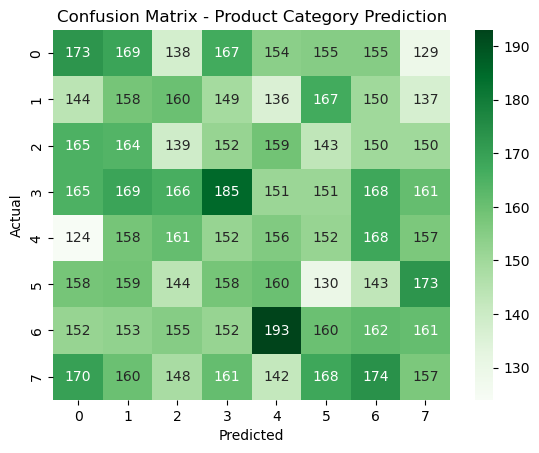

Product Category Classes: ['Beauty' 'Books' 'Clothing' 'Electronics' 'Grocery' 'Home & Kitchen'
 'Sports' 'Toys']


In [18]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv('ecommerce_transactions dataset.csv') 
print("First 5 Rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
df.dropna(inplace=True)
le_country = LabelEncoder()
le_payment = LabelEncoder()
le_category = LabelEncoder()

df['Country'] = le_country.fit_transform(df['Country'])
df['Payment_Method'] = le_payment.fit_transform(df['Payment_Method'])
df['Product_Category'] = le_category.fit_transform(df['Product_Category'])  
X = df[['Age', 'Country', 'Payment_Method', 'Purchase_Amount']] 
y = df['Product_Category']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Product Category Prediction")
plt.show()
decoded_categories = le_category.inverse_transform(sorted(df['Product_Category'].unique()))
print("Product Category Classes:", decoded_categories)


Customer Segmentation using KMeans Clustering

First 5 Rows:
    Transaction_ID        User_Name  Age  Country Product_Category  \
0               1         Ava Hall   63   Mexico         Clothing   
1               2      Sophia Hall   59    India           Beauty   
2               3  Elijah Thompson   26   France            Books   
3               4     Elijah White   43   Mexico           Sports   
4               5       Ava Harris   48  Germany           Beauty   

   Purchase_Amount Payment_Method Transaction_Date  
0           780.69     Debit Card       14-04-2023  
1           738.56         PayPal       30-07-2023  
2           178.34    Credit Card       17-09-2023  
3           401.09            UPI       21-06-2023  
4           594.83    Net Banking       29-10-2024  

Missing values:
 Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64


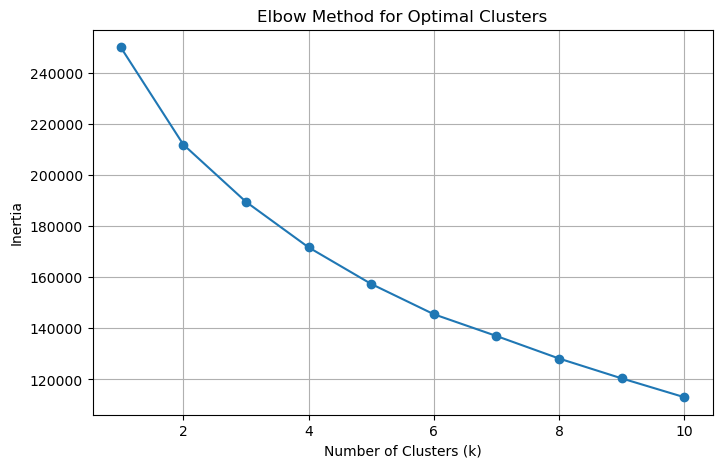


Cluster Counts:
 Cluster
2    12724
0    12549
1    12457
3    12270
Name: count, dtype: int64

Cluster Centroids:
         Age   Country  Product_Category  Payment_Method  Purchase_Amount
0 -0.502247 -0.750978          0.864484        0.006780        -0.040394
1  0.911114  0.721287          0.473567       -0.046455         0.037339
2  0.389224 -0.779613         -0.884981        0.025126         0.052402
3 -0.814027  0.843637         -0.445243        0.014118        -0.050914


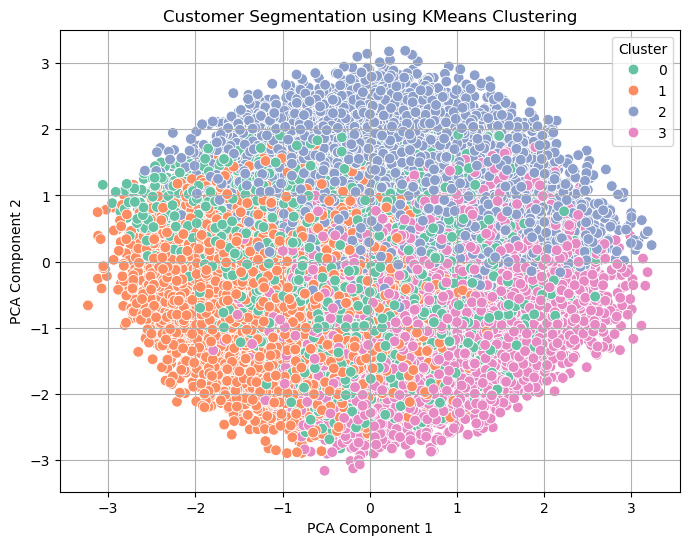

In [19]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df = pd.read_csv('ecommerce_transactions dataset.csv')  
print("First 5 Rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

df.dropna(inplace=True)
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Product_Category'] = le.fit_transform(df['Product_Category'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])
features = ['Age', 'Country', 'Product_Category', 'Payment_Method', 'Purchase_Amount']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("\nCluster Counts:\n", df['Cluster'].value_counts())
print("\nCluster Centroids:\n", pd.DataFrame(kmeans.cluster_centers_, columns=features))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title("Customer Segmentation using KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()
